In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
DATA_COL_NAMES = [ "state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", "racePctWhite",
"racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage",
"pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap",
"AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
"PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
"PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
"PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
"PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc",
"PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian",
"RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85",
"PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop",
"RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea",
"PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop",
 ]

In [3]:
# Load data
data = pd.read_csv(DATA_URL, sep=",", header=None)
data.columns = DATA_COL_NAMES

# Trim data
data = data._get_numeric_data()
data = data.drop(["state", "fold"], axis=1).values

In [4]:
# Get bar
data -= np.mean(data, axis=0)

In [5]:
cov = data.T @ data / (data.shape[0] - 1)
stdev_inv = np.diag(1 / np.sqrt(np.diag(cov)))
cor = stdev_inv @ cov @ stdev_inv

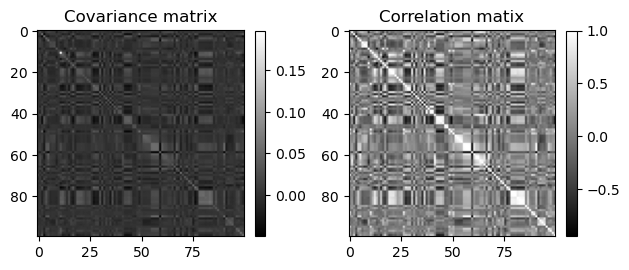

In [6]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("Covariance matrix")
h0 = axes[0].imshow(cov, vmin=np.min(cov), vmax=np.max(cov), cmap="gray")
axes[1].set_title("Correlation matix")
h1 = axes[1].imshow(cor, vmin=np.min(cor), vmax=np.max(cor), cmap="gray")
fig.colorbar(h0, ax=axes[0], fraction=0.045)
fig.colorbar(h1, ax=axes[1], fraction=0.045)
plt.tight_layout()
plt.show()